In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

/Users/rushi/opt/anaconda3/envs/FoAI/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [16]:

df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [32]:
X = df[['rm']]
y = df['medv']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 266 samples
Testing set size: 67 samples


In [34]:
# Add a column of ones to X_train and X_test for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Convert to numpy arrays
y_train = y_train.values
y_test = y_test.values

# Calculate theta using the normal equation
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Extract the intercept and coefficient
intercept = theta_best[0]
coefficient = theta_best[1]

In [35]:
# Predict on the test set
y_pred = X_test_b.dot(theta_best)

# Calculate Mean Squared Error and R-squared
mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 36.36162251588985
R-squared: 0.5959747117709411


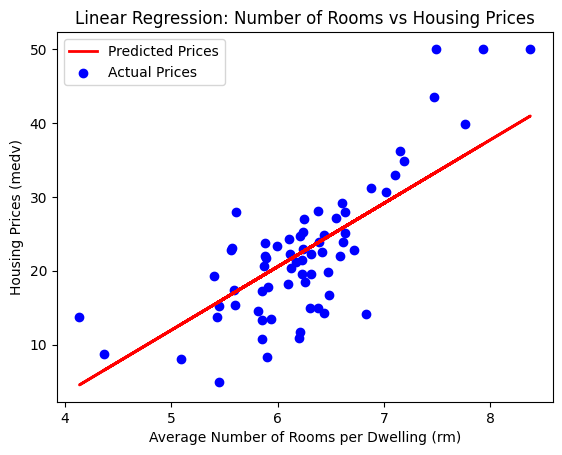

In [38]:
import matplotlib.pyplot as plt

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test.values, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Average Number of Rooms per Dwelling (rm)')
plt.ylabel('Housing Prices (medv)')
plt.title('Linear Regression: Number of Rooms vs Housing Prices')
plt.legend()
plt.show()